# IANNWTF 20/21
## Homework 05
### Marty Schüller, Hannes Erbis

Thanks to Hannah-Richert and leonl42 for providing their code from previous tasks which heavily inspired our works.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
from src.util import *
from src.model import MyModel
from src.classify import *

In [3]:
tf.keras.backend.clear_session()
train_ds, valid_ds, test_ds = load_data()

In [4]:
layers = [
    tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation=tf.nn.sigmoid),
    tf.keras.layers.AveragePooling2D(pool_size=3, padding="same"),
    tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation=tf.nn.sigmoid),
    tf.keras.layers.AveragePooling2D(pool_size=3, padding="same"),
    tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation=tf.nn.sigmoid),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax),
    ]

model = MyModel(layers)

Epoch: 0 starting with accuracy 0.0999800106609808
Epoch: 1 starting with accuracy 0.6651186034115139
Epoch: 2 starting with accuracy 0.7189365671641791
Epoch: 3 starting with accuracy 0.7441897654584221
Epoch: 4 starting with accuracy 0.7773620735607676
Epoch: 5 starting with accuracy 0.7993803304904051
Epoch: 6 starting with accuracy 0.7999866737739872
Epoch: 7 starting with accuracy 0.8230510394456291
Epoch: 8 starting with accuracy 0.8223680703624734
Epoch: 9 starting with accuracy 0.8203757995735608
Test accuracy: tf.Tensor(0.8180804035781153, shape=(), dtype=float64)


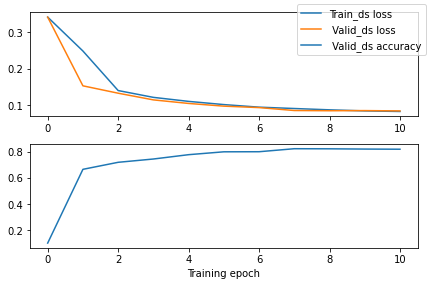

In [5]:
learning_rate = 0.01
epochs = 10
optimizer =  tf.keras.optimizers.Adam(learning_rate)
loss_funcion = tf.keras.losses.CategoricalCrossentropy()

results, model = classify(model, optimizer, epochs, train_ds, valid_ds)
test_loss, test_accuracy = test(model, test_ds, loss_funcion)
print("Test accuracy:", test_accuracy)
visualize(results[0], results[1], results[2])